In [2]:
import sys
sys.path.append('./../')

In [3]:
import ikamoana.fisherieseffort.fisherieseffort as fe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
filepath = "./../data/fisheries_effort/skj_fisheries_data_2021_Nov17.txt"

In [4]:
fisheries_df = fe.readFile(filepath, header_position=0, columns_name=None)
fisheries_dict = fe.separateFisheries(fisheries_df)

for i in fisheries_dict.keys()  :
    print("[%d]"%(i),end="  ")
print()
for i in fisheries_dict  :
    print(np.unique(fisheries_dict[i].res),end="  ")
print()

f9 = fisheries_dict[9]

[1]  [2]  [3]  [4]  [5]  [6]  [7]  [8]  [9]  [10]  [12]  [13]  [15]  
[1]  [1]  [1]  [1]  [1]  [1]  [1]  [5]  [1]  [1]  [1]  [1]  [5]  


In [5]:
print(len(fisheries_df[(fisheries_df['E']==0) & fisheries_df['C']!=0]))
print(len(fisheries_df[(fisheries_df['E']!=0) & fisheries_df['C']==0]))
print(len(fisheries_df[(fisheries_df['C']==0) & (fisheries_df['E']==0)]))

10780
369532
17845


In [8]:
tmp = np.unique(fisheries_df['f'], return_counts=True)
print(tmp[0])
print(tmp[1])

[ 1  2  3  4  5  6  7  8  9 10 12 13 15]
[192951 102617  64067  18491 149096  93723  73779 146415  23310 121626
 124572  64685   7040]


In [ ]:
np.unique(fisheries_df[fisheries_df['E']==0]['f'], return_counts=True)

In [5]:
np.unique(fisheries_df[fisheries_df['E']==0]['f'], return_counts=True)

(array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12, 13, 15]),
 array([13059,   518,     1,    26,   768,   234,  1851, 12032,     7,
            2,     2,     1]))

In [6]:
np.unique(fisheries_df[(fisheries_df['C']==0) & (fisheries_df['E']==0)]['f'], return_counts=True)

(array([ 1,  2,  5,  7,  8,  9, 10, 12]),
 array([12813,   518,    18,   121,  1846,  2424,     2,     2]))

In [7]:
np.unique(f9['gr'], return_counts=True)

(array(['G', 'H', 'K', 'O', 'R', 'T'], dtype=object),
 array([1261, 4728, 4380, 6120, 3060, 3761]))

In [8]:
f9_gb = fe.groupByFisheries({9:fisheries_dict[9]})
f9_gb = f9_gb[9]

In [9]:
gr_array = []
for gr in f9_gb['gr'] : gr_array = np.concatenate((gr_array, np.array(gr).ravel()))
gr_unique = np.unique(gr_array)
gr_unique

array(['G', 'H', 'K', 'O', 'R', 'T'], dtype=object)

---

In [10]:
print("ALL")
print(len(f9))
print(f9['gr'].unique())

print("\nNO EFFORT")
print(len(f9[(f9['E']==0) & (f9['C']!=0)]))
print(f9[(f9['E']==0) & (f9['C']!=0)]['gr'].unique())

print("\nNO CATCH")
print(len(f9[(f9['E']!=0) & (f9['C']==0)]))
print(f9[(f9['E']!=0) & (f9['C']==0)]['gr'].unique())

print("\nNO CATCH AND NO EFFORT")
print(len(f9[(f9['C']==0) & (f9['E']==0)]))
print(f9[(f9['C']==0) & (f9['E']==0)]['gr'].unique())

print("\nCOMPLET")
print(len(f9[(f9['E']!=0) & (f9['C']!=0)]))
print(f9[(f9['E']!=0) & (f9['C']!=0)]['gr'].unique())


ALL
23310
['H' 'K' 'O' 'R' 'T' 'G']

NO EFFORT
9608
['K' 'O' 'R' 'T' 'G']

NO CATCH
5094
['T' 'G' 'H' 'K']

NO CATCH AND NO EFFORT
2424
['H']

COMPLET
6184
['R' 'T' 'K' 'H']


In [11]:
f9[(f9['E']!=0) & (f9['C']!=0)]['E'].min()

1.0

In [12]:
f9[(f9['E']!=0) & (f9['C']!=0)]['C'].min()

0.001

---
# ALL

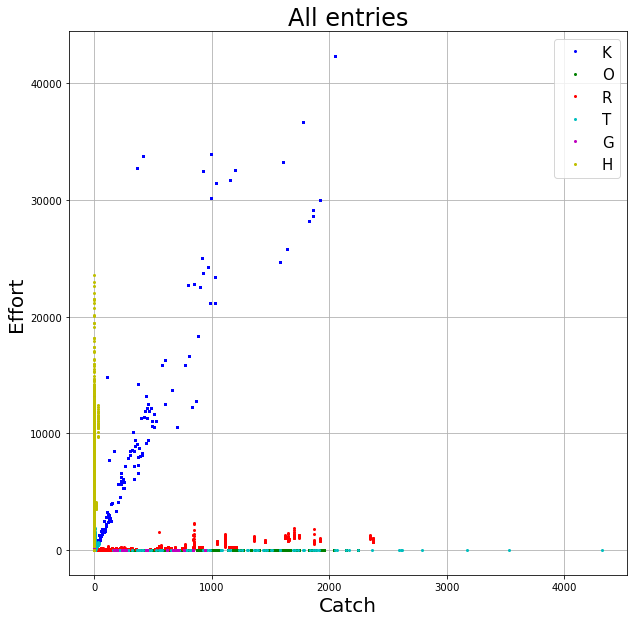

In [29]:
plt.subplots(1,1,figsize=(10,10))

gr = ['K', 'O', 'R', 'T', 'G', 'H']
color = ['b','g','r','c','m','y','k']

for g, c in zip(gr,color) :
    plt.plot(f9[(f9['gr']==g)]['C'],
             f9[(f9['gr']==g)]['E'],
             marker='o', markersize=2, color=c,linestyle="None" )

plt.legend(gr, fontsize=15)
plt.xlabel("Catch", fontsize=20)
plt.ylabel("Effort", fontsize=20)
plt.title("All entries", fontsize=24)
plt.grid(True)
plt.show()

---
# COMPLET

Text(0.5, 1.0, '(Effort != 0) AND (Catch != 0)')

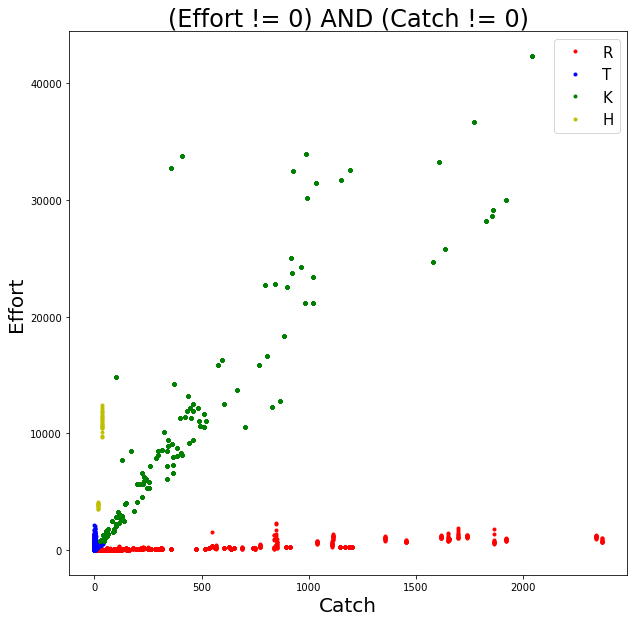

In [14]:
cond = (f9['E']!=0) & (f9['C']!=0)

plt.subplots(1,1,figsize=(10,10))
plt.plot(f9[cond & (f9['gr']=='R')]['C'],
         f9[cond & (f9['gr']=='R')]['E'], '.r')
plt.plot(f9[cond & (f9['gr']=='T')]['C'],
         f9[cond & (f9['gr']=='T')]['E'], '.b')
plt.plot(f9[cond & (f9['gr']=='K')]['C'],
         f9[cond & (f9['gr']=='K')]['E'], '.g')
plt.plot(f9[cond & (f9['gr']=='H')]['C'],
         f9[cond & (f9['gr']=='H')]['E'], '.y')
plt.legend(['R','T','K','H'], fontsize=15)
plt.xlabel("Catch", fontsize=20)
plt.ylabel("Effort", fontsize=20)
plt.title("(Effort != 0) AND (Catch != 0)", fontsize=24)

---
# Transforme

In [15]:
def predictEffort(fishery: pd.DataFrame, conserve_no_catch: bool = False,
                  conserve_empty: bool = False, gear_to_choose: str = 'K',
                  catch_label: str = 'C', gear_label: str = 'gr',
                  effort_label: str = 'E') :
    
    model = fishery[(fishery[gear_label]==gear_to_choose)
                    & (fishery[effort_label]!=0) & (fishery[catch_label]!=0)]
    
    effort_to_predict = pd.DataFrame(fishery[~fishery.index.isin(model.index)])
    
    no_catch_but_effort = effort_to_predict[(effort_to_predict[effort_label]!=0)
                               & (effort_to_predict[catch_label]==0)]

    nothing = effort_to_predict[(effort_to_predict[effort_label]==0)
                               & (effort_to_predict[catch_label]==0)]
    
    effort_to_predict = effort_to_predict[(effort_to_predict[catch_label]!=0)]
    
    regr = linear_model.LinearRegression()
    fun = regr.fit(np.array(model[catch_label])[:,np.newaxis],
                   np.array(model[effort_label]))
    effort_to_predict.drop(effort_label, axis=1)
    effort_to_predict[effort_label] = fun.predict(
        np.array(effort_to_predict[catch_label])[:,np.newaxis])
    
    df_to_return = [model, effort_to_predict]
    if conserve_no_catch : df_to_return.append(no_catch_but_effort)
    if conserve_empty :df_to_return.append(nothing)
    
    return pd.concat(df_to_return)

In [16]:
new_f9 = predictEffort(f9).sort_index()

In [17]:
assert not (False in new_f9.index == f9.sort_index().index)

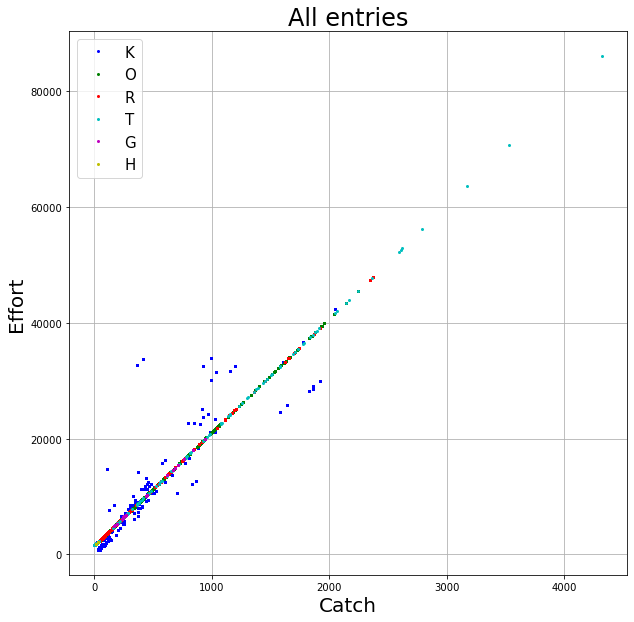

In [25]:
plt.subplots(1,1,figsize=(10,10))

gr = ['K', 'O', 'R', 'T', 'G', 'H']
color = ['b','g','r','c','m','y','k']

for g, c in zip(gr,color) :
    plt.plot(new_f9[(new_f9['gr']==g)]['C'],
             new_f9[(new_f9['gr']==g)]['E'],
             marker='o', markersize=2, color=c,linestyle="None" )

plt.legend(gr, fontsize=15)
plt.xlabel("Catch", fontsize=20)
plt.ylabel("Effort", fontsize=20)
plt.title("All entries", fontsize=24)
plt.grid(True)
plt.show()

In [27]:
len(f9)

23310

In [28]:
len(new_f9)

15792